## Loan Prediction


In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#### Load Data

In [42]:
df1 = pd.read_csv('data/test_Y3wMUE5_7gLdaTN.csv',index_col = False)
df = pd.read_csv('data/train_u6lujuX_CVtuZ9i.csv',index_col = False)
#df = pd.concat([df1,df2],ignore_index=True)
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


##### Data Cleaning and Labeling

In [43]:
print(df.info())
# removing Loan_ID as it wont help the model
col = df.columns.tolist()
col.remove('Loan_ID') 
df = df[col]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #

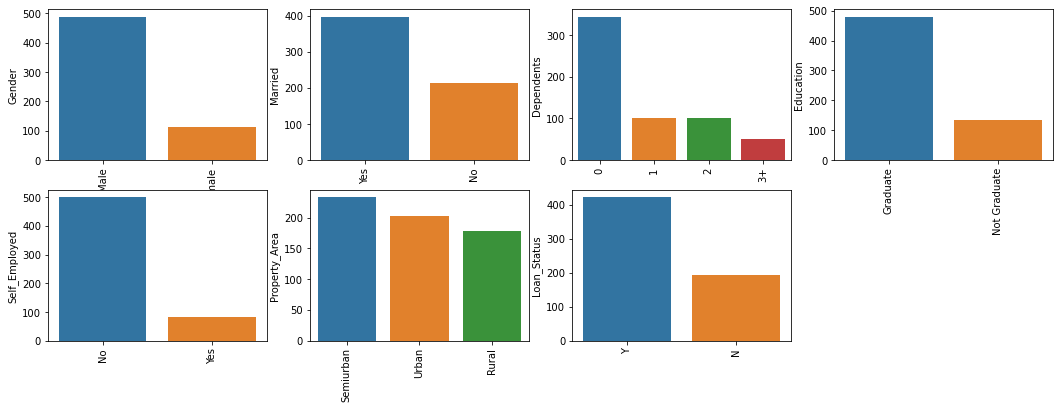

In [44]:

obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1
  
for col in object_cols:
  y = df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

In [45]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] = label_encoder.fit_transform(df[col])


for c in df.columns:
  df[c] = df[c].fillna(df[c].mean()) 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


<AxesSubplot:>

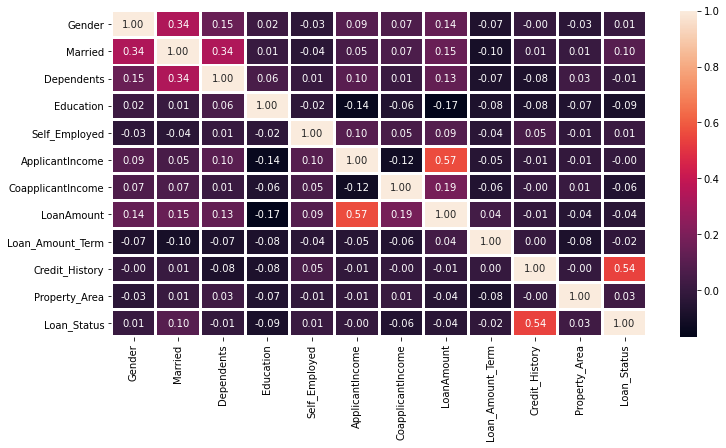

In [46]:

plt.figure(figsize=(12,6))
  
sns.heatmap(df.corr(),fmt='.2f',
            linewidths=2,annot=True)

In [47]:
y = df['Loan_Status']
col = df.columns.tolist()
col.remove('Loan_Status')
x = df[col]

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42)


#### Models

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

##### Random Forests

In [76]:
for x in range(1,11):
    rf = RandomForestClassifier(n_estimators = x, random_state =42)
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_train)
    acc = 100*metrics.accuracy_score(y_train,y_pred)
    print('n_estimators = {}, accuracy = {}'.format(x,acc))

rf = RandomForestClassifier(n_estimators = 8, criterion = 'entropy', random_state =42)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
acc = 100*metrics.accuracy_score(y_test,y_pred)
print('n_estimators = 7, accuracy = {}'.format(acc))

n_estimators = 1, accuracy = 89.0020366598778
n_estimators = 2, accuracy = 87.9837067209776
n_estimators = 3, accuracy = 95.11201629327903
n_estimators = 4, accuracy = 93.48268839103869
n_estimators = 5, accuracy = 95.9266802443992
n_estimators = 6, accuracy = 95.5193482688391
n_estimators = 7, accuracy = 96.74134419551935
n_estimators = 8, accuracy = 97.75967413441956
n_estimators = 9, accuracy = 98.37067209775967
n_estimators = 10, accuracy = 98.98167006109979
n_estimators = 7, accuracy = 75.60975609756098


##### Logmithmic Regression

In [77]:
lr = LogisticRegression(random_state =42)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_train)
acc = 100*metrics.accuracy_score(y_train,y_pred)
print('accuracy = {}'.format(acc))

accuracy = 81.87372708757637


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Nearest Neibors 

In [82]:
for x in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_train)
    acc = 100*metrics.accuracy_score(y_train,y_pred)
    print('n_neighbors = {}, accuracy = {}'.format(x,acc))

knn = KNeighborsClassifier(n_neighbors=3)

n_neighbors = 2, accuracy = 79.42973523421588
n_neighbors = 3, accuracy = 77.59674134419552
n_neighbors = 4, accuracy = 73.31975560081466
n_neighbors = 5, accuracy = 73.72708757637476
n_neighbors = 6, accuracy = 71.89409368635438
n_neighbors = 7, accuracy = 74.13441955193483
n_neighbors = 8, accuracy = 73.5234215885947
n_neighbors = 9, accuracy = 72.91242362525459
n_neighbors = 10, accuracy = 73.11608961303462


##### SVM


In [68]:
svm = SVC().fit(x_train,y_train)
y_pred = lr.predict(x_test)
acc = 100*metrics.accuracy_score(y_test,y_pred)
print('accuracy = {}'.format(acc))

accuracy = 78.86178861788618


In [84]:
for clf in (rf, knn, svm,lr):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__,
    "Accuracy score of ",
          "=",100*metrics.accuracy_score(y_test, 
                                         y_pred))

RandomForestClassifier Accuracy score of  = 75.60975609756098
KNeighborsClassifier Accuracy score of  = 61.78861788617886
SVC Accuracy score of  = 65.04065040650406
LogisticRegression Accuracy score of  = 78.86178861788618


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
